In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset  
from skimage import io

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/Soft Computing/Assignment 2/Dataset C.zip"

Streaming output truncated to the last 5000 lines.
  inflating: training-c/c19299.png   
  inflating: training-c/c19300.png   
  inflating: training-c/c19301.png   
  inflating: training-c/c19302.png   
  inflating: training-c/c19303.png   
  inflating: training-c/c19304.png   
  inflating: training-c/c19305.png   
  inflating: training-c/c19306.png   
  inflating: training-c/c19307.png   
  inflating: training-c/c19308.png   
  inflating: training-c/c19309.png   
  inflating: training-c/c19310.png   
  inflating: training-c/c19311.png   
  inflating: training-c/c19312.png   
  inflating: training-c/c19313.png   
  inflating: training-c/c19314.png   
  inflating: training-c/c19315.png   
  inflating: training-c/c19316.png   
  inflating: training-c/c19317.png   
  inflating: training-c/c19318.png   
  inflating: training-c/c19319.png   
  inflating: training-c/c19320.png   
  inflating: training-c/c19321.png   
  inflating: training-c/c19322.png   
  inflating: training-c/c19323.png   

# Loading Dataset

In [ ]:
# reading Dataset
data = pd.read_csv('training-c.csv')
data.head(1)

,filename,original filename,scanid,digit,database name original,contributing team,database name
0,c00000.png,Scan_280_digit_6_num_7.png,280,6,OngkoDB,Buet_Backpropers,training-c


In [ ]:
# dropping columns
data.drop(['original filename','scanid'],axis=1,inplace=True)
data.drop(data.columns[2:5],axis=1,inplace=True)
data.head(1)

,filename,digit
0,c00000.png,6


In [ ]:
class Digit_dataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 3]))

        if self.transform:
            image = self.transform(image)

        return (image, y_label)

In [ ]:
import torchvision.transforms as transforms
data = Digit_dataset("/content/training-c.csv","/content/training-c", transforms.Compose([transforms.ToPILImage(), transforms.Resize(size=(28, 28)), transforms.ToTensor()]))

In [ ]:
data.__len__()


24298

In [ ]:
train_dataset, test_dataset = torch.utils.data.random_split(data, [19438, 4860])

# Experiment 1

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms

In [ ]:
# Hyperparameters

batch_size = 20
num_iters = 20000
input_dim = 28*28 # num_features = 784
num_hidden = 200 # num of hidden nodes
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  


In [ ]:
print(len(train_dataset))
print(len(test_dataset))

19438
4860


In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_3(out)
        
        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_5(out)
        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_6(out)
     
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
iteration_loss= []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
  

Iteration: 500. Loss: 2.3041183948516846. Accuracy: 9.794238683127572
Iteration: 1000. Loss: 2.3044075965881348. Accuracy: 10.041152263374485
Iteration: 1500. Loss: 2.299910068511963. Accuracy: 10.020576131687243
Iteration: 2000. Loss: 2.2993597984313965. Accuracy: 9.938271604938272
Iteration: 2500. Loss: 2.3065805435180664. Accuracy: 11.851851851851851
Iteration: 3000. Loss: 2.303048849105835. Accuracy: 10.0
Iteration: 3500. Loss: 2.299790859222412. Accuracy: 9.938271604938272
Iteration: 4000. Loss: 2.301687002182007. Accuracy: 9.958847736625515
Iteration: 4500. Loss: 2.3074727058410645. Accuracy: 10.041152263374485
Iteration: 5000. Loss: 2.3041043281555176. Accuracy: 10.308641975308642
Iteration: 5500. Loss: 2.302980422973633. Accuracy: 9.938271604938272
Iteration: 6000. Loss: 2.304062843322754. Accuracy: 9.732510288065845
Iteration: 6500. Loss: 2.3029959201812744. Accuracy: 10.041152263374485
Iteration: 7000. Loss: 2.303706645965576. Accuracy: 9.732510288065845
Iteration: 7500. Loss

[2.3041183948516846, 2.3044075965881348, 2.299910068511963, 2.2993597984313965, 2.3065805435180664, 2.303048849105835, 2.299790859222412, 2.301687002182007, 2.3074727058410645, 2.3041043281555176, 2.302980422973633, 2.304062843322754, 2.3029959201812744, 2.303706645965576, 2.305565357208252, 2.3008594512939453, 2.299654960632324, 2.301525592803955, 2.301567316055298, 2.300391435623169, 2.3015079498291016, 2.3036608695983887, 2.3029072284698486, 2.300647258758545, 2.3010056018829346, 2.301215648651123, 2.3054819107055664, 2.2996768951416016, 2.3061983585357666, 2.3053317070007324, 2.3002655506134033, 2.2990825176239014, 2.3003907203674316, 2.298370838165283, 2.3048484325408936, 2.303262233734131, 2.296901226043701, 2.2993369102478027]


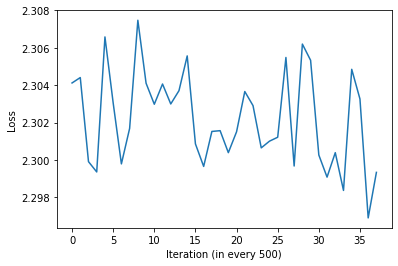

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()